<a href="https://colab.research.google.com/github/coder-jkb/ML-projects/blob/main/Decision_Tree_using_sklearn_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classifier & Regressor using Scikit Learn
## Jay Bhanushali (60009200047)

## Import libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

## load data

In [ ]:
df = pd.read_csv('/content/breastcancer.csv')
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [ ]:
# del df['id']
# del df['Unnamed: 32']
df.drop('id',axis=1, inplace=True)
df.drop('Unnamed: 32',axis=1, inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
df.replace(to_replace = 'B', value=1, inplace=True)
df.replace(to_replace = 'M', value=0, inplace=True)
df.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
feature_cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

X = df[feature_cols]
y = df.diagnosis

In [ ]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train

(398, 30)
(171, 30)
(398,)
(171,)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.340,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.260,22.75,91.99,632.1,0.10250,0.25310,0.33080,0.08978,0.2048,0.07628
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.460,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
195,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.880,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [ ]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)

In [ ]:
print(f'Accuracy on training dataset : {round(train_accuracy,4)*100} %')
print(f'Accuracy on testing dataset  : {round(test_accuracy,4)*100} %')

Accuracy on training dataset : 100.0 %
Accuracy on testing dataset  : 94.15 %


### Confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[ 61,   2],
       [  8, 100]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


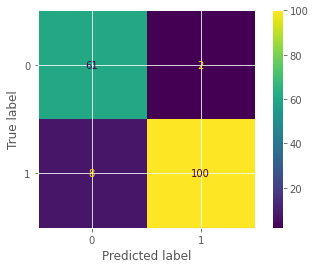

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

for loop max depth 1 to 20, calculate accuracy, seperate accuracy for train & test

In [ ]:
train_acc_list = []
test_acc_list = []
# depth from 2 to 20
depths = range(1,21)
for depth in depths:
    # make model (of required depth) and fit that model
    model = DecisionTreeClassifier(max_depth=depth)
    model = model.fit(X_train, y_train)

    # predict train and test labels
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # calc accuracy of train and test and keep appending in seperate lists
    train_acc_list.append( accuracy_score(y_train, y_pred_train) )
    test_acc_list.append( accuracy_score(y_test, y_pred_test) )

In [ ]:
print(train_acc_list)
print(test_acc_list)

[0.9246231155778895, 0.9422110552763819, 0.9698492462311558, 0.9949748743718593, 0.9949748743718593, 0.9974874371859297, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.8947368421052632, 0.9298245614035088, 0.9590643274853801, 0.9590643274853801, 0.9590643274853801, 0.9415204678362573, 0.9298245614035088, 0.9239766081871345, 0.935672514619883, 0.9239766081871345, 0.9181286549707602, 0.9239766081871345, 0.9415204678362573, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9239766081871345, 0.9181286549707602, 0.935672514619883, 0.9415204678362573]


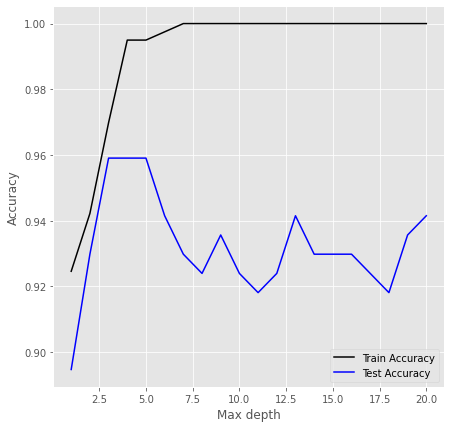

In [ ]:
depth_list = range(1,21)
fig = plt.figure(figsize=(7,7))

plt.plot(depth_list, train_acc_list, label='Train Accuracy', color='black')
plt.plot(depth_list, test_acc_list, label='Test Accuracy', color='blue')

plt.xlabel('Max depth')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

In [ ]:
max_test_acc = max(test_acc_list)
values = np.array(test_acc_list)
index = np.where(values == max_test_acc)[0]
index = index.tolist()
max_depth = [x+1 for x in index]
print(f'Maximum test accuracy is {round(max_test_acc*100, 3)} % at max-depth {max_depth}')

Maximum test accuracy is 95.906 % at max-depth [3, 4, 5]


In [ ]:
for i in index:
    print(f'Training accuracy at depth {i} is {round(train_acc_list[i]*100,3)} %')

Training accuracy at depth 2 is 96.985 %
Training accuracy at depth 3 is 99.497 %
Training accuracy at depth 4 is 99.497 %


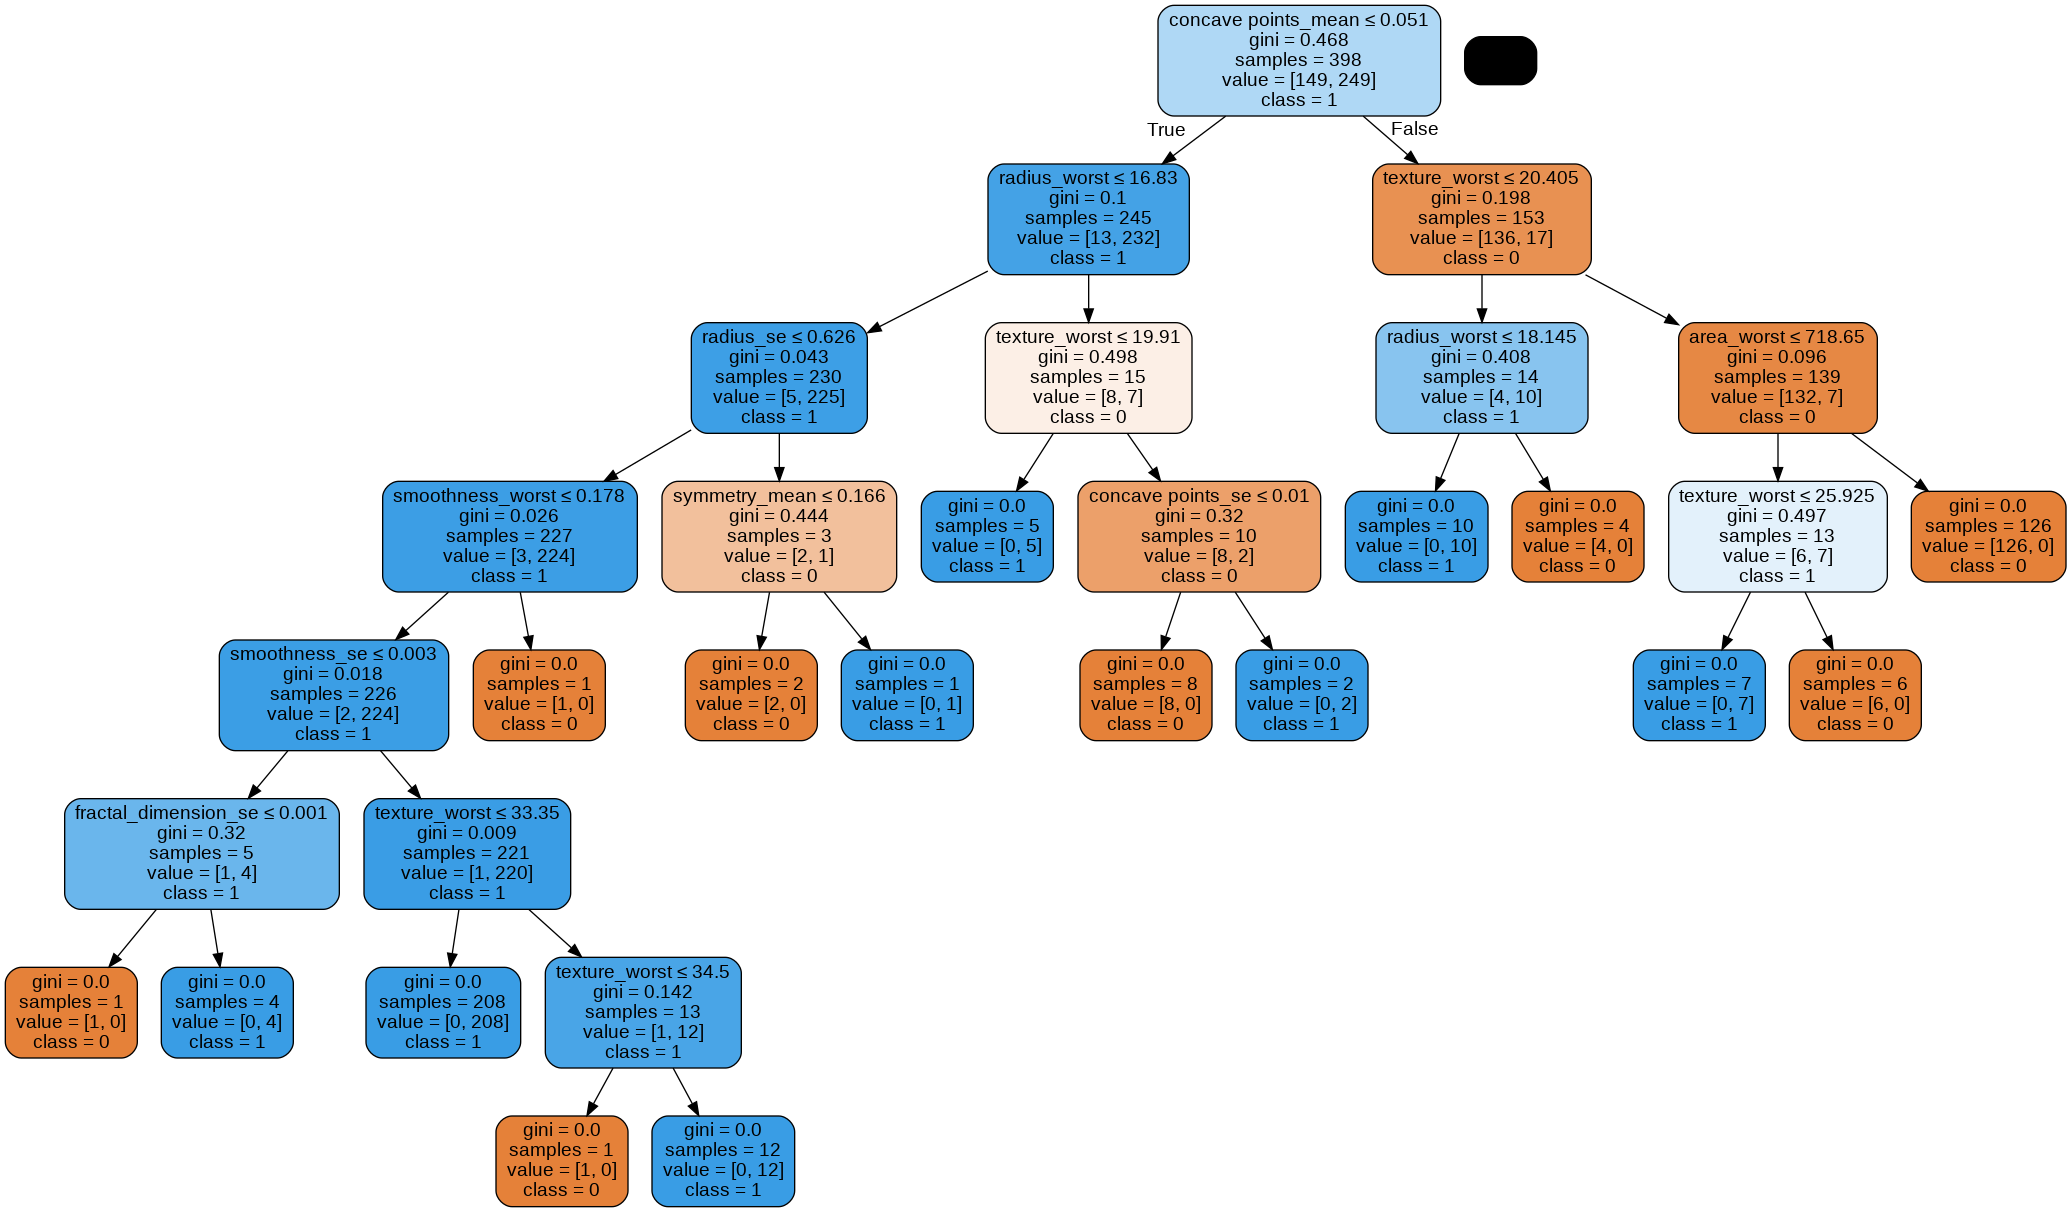

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  filled=True, rounded=True,
                    special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('breastcancer.csv')
Image(graph.create_png())

# Decision tree regressor
## carpredection dataset

In [ ]:
car = pd.read_csv('/content/carprediction.csv')
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
car.info

<bound method DataFrame.info of           Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylin

In [ ]:
car.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Dropped all null values

In [ ]:
car.dropna(inplace=True)
car.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [ ]:
car.columns = car.columns.str.replace(' ','_')
car.columns


Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8084 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               8084 non-null   object 
 1   Model              8084 non-null   object 
 2   Year               8084 non-null   int64  
 3   Engine_Fuel_Type   8084 non-null   object 
 4   Engine_HP          8084 non-null   float64
 5   Engine_Cylinders   8084 non-null   float64
 6   Transmission_Type  8084 non-null   object 
 7   Driven_Wheels      8084 non-null   object 
 8   Number_of_Doors    8084 non-null   float64
 9   Market_Category    8084 non-null   object 
 10  Vehicle_Size       8084 non-null   object 
 11  Vehicle_Style      8084 non-null   object 
 12  highway_MPG        8084 non-null   int64  
 13  city_mpg           8084 non-null   int64  
 14  Popularity         8084 non-null   int64  
 15  MSRP               8084 non-null   int64  
dtypes: float64(3), int64(5)

In [ ]:
obj = car.select_dtypes(exclude=['number'])
obj_cols = obj.columns
obj_cols

Index(['Make', 'Model', 'Engine_Fuel_Type', 'Transmission_Type',
       'Driven_Wheels', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lab_enc = LabelEncoder() # creating instance of class LabelEncoder
for x in obj_cols:
  car[x] = lab_enc.fit_transform(car[x])
  car[x] = car[x] + 1

car

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,5,2,2011,7,335.0,6.0,4,4,2.0,38,1,9,26,19,3916,46135
1,5,1,2011,7,300.0,6.0,4,4,2.0,67,1,7,28,19,3916,40650
2,5,1,2011,7,300.0,6.0,4,4,2.0,64,1,9,28,20,3916,36350
3,5,1,2011,7,230.0,6.0,4,4,2.0,67,1,9,28,18,3916,29450
4,5,1,2011,7,230.0,6.0,4,4,2.0,63,1,7,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,1,704,2012,7,300.0,6.0,2,1,4.0,14,3,3,23,16,204,46120
11910,1,704,2012,7,300.0,6.0,2,1,4.0,14,3,3,23,16,204,56670
11911,1,704,2012,7,300.0,6.0,2,1,4.0,14,3,3,23,16,204,50620
11912,1,704,2013,6,300.0,6.0,2,1,4.0,14,3,3,23,16,204,50920


In [ ]:
car_cols = ['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity']
X = car[car_cols]
y = car.MSRP
X

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity
0,5,2,2011,7,335.0,6.0,4,4,2.0,38,1,9,26,19,3916
1,5,1,2011,7,300.0,6.0,4,4,2.0,67,1,7,28,19,3916
2,5,1,2011,7,300.0,6.0,4,4,2.0,64,1,9,28,20,3916
3,5,1,2011,7,230.0,6.0,4,4,2.0,67,1,9,28,18,3916
4,5,1,2011,7,230.0,6.0,4,4,2.0,63,1,7,28,18,3916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,1,704,2012,7,300.0,6.0,2,1,4.0,14,3,3,23,16,204
11910,1,704,2012,7,300.0,6.0,2,1,4.0,14,3,3,23,16,204
11911,1,704,2012,7,300.0,6.0,2,1,4.0,14,3,3,23,16,204
11912,1,704,2013,6,300.0,6.0,2,1,4.0,14,3,3,23,16,204


In [ ]:
print(X.shape)
print(y.shape)

(8084, 15)
(8084,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train

(5658, 15)
(2426, 15)
(5658,)
(2426,)


,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity
6227,34,378,2016,6,188.0,4.0,4,3,4.0,15,1,3,34,28,2009
150,5,13,2016,7,240.0,4.0,2,1,4.0,63,3,16,34,22,3916
1721,30,118,2000,5,143.0,6.0,4,4,2.0,41,1,11,21,16,586
4307,21,230,2013,6,325.0,6.0,2,1,4.0,17,3,4,24,17,190
9794,16,604,2002,8,190.0,6.0,2,4,2.0,41,1,14,20,15,549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,46,477,2016,7,280.0,6.0,1,3,4.0,69,3,15,28,20,873
7736,11,491,2001,7,253.0,6.0,2,4,2.0,61,1,7,21,15,1013
1003,47,72,1995,8,181.0,6.0,2,4,4.0,63,3,15,23,15,870
11243,20,665,2016,8,201.0,4.0,4,3,3.0,60,1,1,33,25,1439


In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
model2 = DecisionTreeRegressor()
model2 = model2.fit(X_train, y_train)

y_pred_train = model2.predict(X_train)
train_err = rmse(y_train, y_pred_train)

y_pred_test = model2.predict(X_test)
test_err = rmse(y_test, y_pred_test)

print(train_err)
print(test_err)


2842.750907329158
15983.985932583633


In [ ]:
train_err_l = []
test_err_l = []
for d in range(2,51):
  model2 = DecisionTreeRegressor(max_depth=d)
  model2 = model2.fit(X_train, y_train)

  y_pred_train = model2.predict(X_train)
  train_err = rmse(y_train, y_pred_train)
  train_err_l.append(train_err)

  y_pred_test = model2.predict(X_test)
  test_err = rmse(y_test, y_pred_test)
  test_err_l.append(test_err)

In [ ]:
min_err = min(test_err_l)
values = np.array(test_err_l)
min_index = np.where(values == min_err)[0]
min_index = min_index.tolist()
max_index = [x+1 for x in min_index]
print(f'Minimum RMSE {round(min_err,3)} at depth {min_index}')

Minimum RMSE 15405.133 at depth [32]


In [ ]:
for i in range(len(train_err_l)):
  print(f'depth {i+1} : {round(train_err_l[i],3)} ')

for i in range(len(test_err_l)):
  print(f'depth {i+1} : {round(test_err_l[i],3)} ')

depth 1 : 42251.98 
depth 2 : 36749.85 
depth 3 : 27242.505 
depth 4 : 20058.003 
depth 5 : 16943.115 
depth 6 : 13438.232 
depth 7 : 11198.293 
depth 8 : 9175.376 
depth 9 : 7965.369 
depth 10 : 7028.117 
depth 11 : 5417.944 
depth 12 : 4481.646 
depth 13 : 3861.847 
depth 14 : 3493.188 
depth 15 : 3284.016 
depth 16 : 3139.315 
depth 17 : 3036.655 
depth 18 : 2959.063 
depth 19 : 2913.643 
depth 20 : 2875.64 
depth 21 : 2855.676 
depth 22 : 2846.674 
depth 23 : 2844.243 
depth 24 : 2843.171 
depth 25 : 2842.789 
depth 26 : 2842.755 
depth 27 : 2842.751 
depth 28 : 2842.751 
depth 29 : 2842.751 
depth 30 : 2842.751 
depth 31 : 2842.751 
depth 32 : 2842.751 
depth 33 : 2842.751 
depth 34 : 2842.751 
depth 35 : 2842.751 
depth 36 : 2842.751 
depth 37 : 2842.751 
depth 38 : 2842.751 
depth 39 : 2842.751 
depth 40 : 2842.751 
depth 41 : 2842.751 
depth 42 : 2842.751 
depth 43 : 2842.751 
depth 44 : 2842.751 
depth 45 : 2842.751 
depth 46 : 2842.751 
depth 47 : 2842.751 
depth 48 : 2842.75

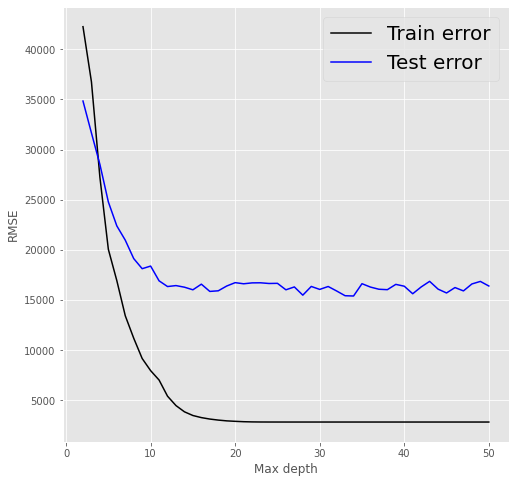

In [ ]:
depth_list = range(2,51)
fig = plt.figure(figsize=(8,8))

plt.plot(depth_list, train_err_l, label='Train error', color='black')
plt.plot(depth_list, test_err_l, label='Test error', color='blue')

plt.xlabel('Max depth')
plt.ylabel('RMSE')

plt.legend(prop={'size': 20})

plt.show()